In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from lightgbm import LGBMRegressor 
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

EDA + Data preprocessing

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


In [3]:
df.shape

(301, 9)

In [4]:
df.columns.tolist()

['Car_Name',
 'Year',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner',
 'Selling_Price']

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.describe()

,Year,Present_Price,Kms_Driven,Owner,Selling_Price
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,7.628472,36947.205980,0.043189,4.661296
std,2.891554,8.644115,38886.883882,0.247915,5.082812
min,2003.000000,0.320000,500.000000,0.000000,0.100000
25%,2012.000000,1.200000,15000.000000,0.000000,0.900000
50%,2014.000000,6.400000,32000.000000,0.000000,3.600000
75%,2016.000000,9.900000,48767.000000,0.000000,6.000000
max,2018.000000,92.600000,500000.000000,3.000000,35.000000


In [8]:
df.corr()

/var/folders/rx/q5w9l9sd7zq8l0t_p73qg_l00000gn/T/ipykernel_32879/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Present_Price,Kms_Driven,Owner,Selling_Price
Year,1.000000,-0.047584,-0.524342,-0.182104,0.236141
Present_Price,-0.047584,1.000000,0.203647,0.008057,0.878983
Kms_Driven,-0.524342,0.203647,1.000000,0.089216,0.029187
Owner,-0.182104,0.008057,0.089216,1.000000,-0.088344
Selling_Price,0.236141,0.878983,0.029187,-0.088344,1.000000


/var/folders/rx/q5w9l9sd7zq8l0t_p73qg_l00000gn/T/ipykernel_32879/1928437958.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


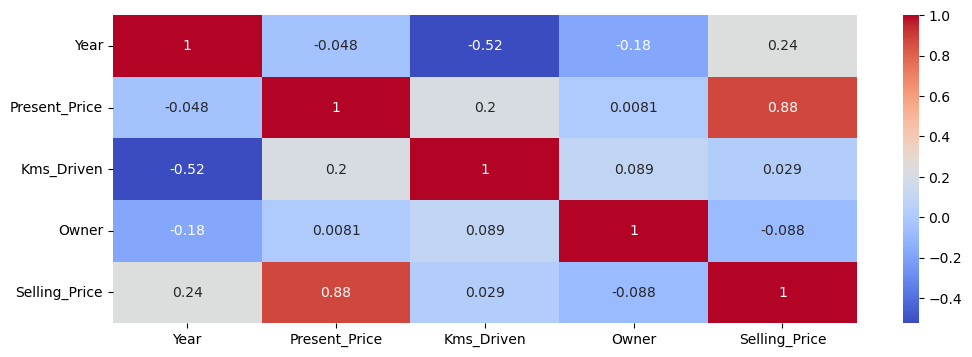

In [9]:
plt.figure(figsize=(12,4))
correlations = df.corr()
sns.heatmap(correlations, cmap = "coolwarm", annot = True)
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
df["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [12]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [13]:
le = LabelEncoder()
df["Fuel_Type"] = le.fit_transform(df.Fuel_Type.values)
df["Transmission"] = le.fit_transform(df.Transmission.values)
df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,2,Dealer,1,0,3.35
1,sx4,2013,9.54,43000,1,Dealer,1,0,4.75
2,ciaz,2017,9.85,6900,2,Dealer,1,0,7.25
3,wagon r,2011,4.15,5200,2,Dealer,1,0,2.85
4,swift,2014,6.87,42450,1,Dealer,1,0,4.60


In [14]:
df.Fuel_Type.unique()
# Petrol = 2, Diesel = 1, CNG = 0

array([2, 1, 0])

In [16]:
df.Transmission.unique()
# Manual = 1, Automatic = 0

array([1, 0])

In [17]:
df.Owner.unique()
# First = 0, Second = 1, Fourth = 3

array([0, 1, 3])

Training Model

In [25]:
label = "Selling_Price"
df = df[["Year", "Kms_Driven", "Transmission", "Owner","Present_Price", "Fuel_Type", "Selling_Price"]]

In [26]:
x = np.array(df.drop([label], 1))
y = np.array(df[label])

/var/folders/rx/q5w9l9sd7zq8l0t_p73qg_l00000gn/T/ipykernel_32879/3124028873.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop([label], 1))


In [27]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [28]:
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor().fit(X_train, y_train)
gb = GradientBoostingRegressor().fit(X_train, y_train)
lgmb = LGBMRegressor().fit(X_train, y_train)
cat = CatBoostRegressor().fit(X_train, y_train)
xgb = XGBRegressor().fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 146
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 5
[LightGBM] [Info] Start training from score 4.810000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [29]:
def evaluate_model(model, X_test, y_test):
    prediction = model.predict(X_test)
    print("Mean squared error: ", mean_squared_error(y_test, prediction))
    print("Mean absolute percent error: ", mean_absolute_percentage_error(y_test, prediction))
    print("Mean absolute error: ", mean_absolute_error(y_test, prediction))
    print("R2 Score: ", r2_score(y_test, prediction))

In [30]:
print("LR: ", evaluate_model(lr, X_test, y_test))
print("GB: ", evaluate_model(gb, X_test, y_test))
print("RF: ", evaluate_model(rf, X_test, y_test))
print("XGB: ", evaluate_model(xgb, X_test, y_test))
print("Light: ", evaluate_model(lgmb, X_test, y_test))
print("Cat: ", evaluate_model(cat, X_test, y_test))

Mean squared error:  2.313180362570901
Mean absolute percent error:  0.9585000729254627
Mean absolute error:  1.1320313520858638
R2 Score:  0.839638913817865
LR:  None
Mean squared error:  0.586501220031614
Mean absolute percent error:  0.18878360194120003
Mean absolute error:  0.49960341164088107
R2 Score:  0.9593408390399414
GB:  None
Mean squared error:  0.4554892483606549
Mean absolute percent error:  0.1352079387111274
Mean absolute error:  0.4433360655737705
R2 Score:  0.9684232359078917
RF:  None
Mean squared error:  0.5291450893906033
Mean absolute percent error:  0.1432338986630473
Mean absolute error:  0.4651686750181386
R2 Score:  0.9633170492644543
XGB:  None
Mean squared error:  1.9547387215084941
Mean absolute percent error:  0.3719240262550772
Mean absolute error:  0.7607758020968284
R2 Score:  0.8644878585105262
Light:  None
Mean squared error:  0.574063755341748
Mean absolute percent error:  0.17250280348209207
Mean absolute error:  0.5249954340650232
R2 Score:  0.9602

Predictions

In [31]:
predictions = cat.predict(X_test)
predictions

array([ 0.72428449,  0.42473979,  2.35086172,  4.26833782,  3.70417789,
        6.25387924,  8.02276681, 11.80368253,  5.77997417,  8.97411003,
        2.69445623,  8.1954612 ,  1.22938058,  7.72980189,  8.88838772,
        4.66894296,  1.45736143,  0.45610306,  2.8554328 , 10.13072586,
        0.65667331,  8.77004728,  5.06713262,  5.79655938,  0.21563312,
        3.96869628,  0.48734554,  0.4324059 ,  5.33017841,  0.40832094,
        0.65760081,  0.13300343,  7.67981948,  1.82110987,  4.90515445,
        1.12056796, 12.30138488,  0.19877261,  2.43651595,  0.52803517,
        4.2738599 ,  8.15263235,  0.65726856,  2.69910838, 20.43160468,
        7.74274833,  1.04239506,  3.29195737,  0.64829221,  5.25194619,
        6.24603755,  5.72794969,  2.35188446,  3.74803206,  3.98099834,
        6.60918339,  0.72980035,  0.59960466,  7.84961352,  1.00625115,
        3.51029644])

In [32]:
import pickle
pickle.dump(cat, open("car_price_predictor.pkl", "wb"))